

# Project: Investigate a Dataset : TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I have selected is the TMDB dataset.  This dataset includes information on movies pertaining to popularity, budget, and revenue that I will explore. In addition, I will be looking at the popularity of different genres.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='wrangling'></a>
## Data Wrangling

In this section I will load the dataset, check for null-values, and then get rid of the null values.



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb_movies.csv')
df.head() #returns first five lines to check for correct dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#gives concise summary of dataset including non-null values, columns and rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#sums up all the null values for each column.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The columns with null values are: 

-imdb_id

-homepage

-cast

-director

-tagline

-keywords

-overview

-genres

-production_companies

The only column with null-values that pertain to this analysis are the imdb_id and genres column.  This imdb_id column indentifies movies individually with each movie having their own imdb_id.  The genres column categorizes the movie into specific genres. Because this number of null-values for both these columns is so small, I will delete them.

The other null-values do not pertain to this analysis so they will be left as is.

### Data Cleaning (Dropping null-values)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#get a count (sum) of the duplicates
sum(df.duplicated())

1

In [6]:
#get rid of duplicates
df.drop_duplicates(inplace=True)

In [7]:
#confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

In [8]:
#drop the null_values in the 'imdb_id' column
df.dropna(subset=['imdb_id'], inplace=True)

In [9]:
#drop the null values in the 'genres' column
df.dropna(subset=['genres'], inplace=True)

In [10]:
#confirm correction by rechecking for null-values
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7905
director                  39
tagline                 2801
keywords                1471
overview                   2
runtime                    0
genres                     0
production_companies    1012
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Research Question 1 
What genres of movie has been made the most throughout the years?

What genre of movie recieves the highest average popularity rating?


In [11]:
#'genres' type is object, which is a string.  I converted to string again just to
#be sure
df['genres']=df.genres.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 21 columns):
id                      10834 non-null int64
imdb_id                 10834 non-null object
popularity              10834 non-null float64
budget                  10834 non-null int64
revenue                 10834 non-null int64
original_title          10834 non-null object
cast                    10759 non-null object
homepage                2929 non-null object
director                10795 non-null object
tagline                 8033 non-null object
keywords                9363 non-null object
overview                10832 non-null object
runtime                 10834 non-null int64
genres                  10834 non-null object
production_companies    9822 non-null object
release_date            10834 non-null object
vote_count              10834 non-null int64
vote_average            10834 non-null float64
release_year            10834 non-null int64
budget_adj              1

In [12]:
#this code iterates through the column 'genres' and splits the value into 
#multiple genres.  It then pulls the first genre and appends to a list.

new_values=[] 
for genre in df['genres']:
    new_genre=genre.split('|') #splits by '|' as that is how the dataset does it
    new_values.append(new_genre[0])
    
print(new_values[:10])#only print the first 10 to check


['Action', 'Action', 'Adventure', 'Action', 'Action', 'Western', 'Science Fiction', 'Drama', 'Family', 'Comedy']


In [13]:
#assign new values to the values in the column 'genres'
df['genres']=new_values

,id
genres,
Action,1587
Adventure,585
Animation,402
Comedy,2318
Crime,380
Documentary,431
Drama,2453
Family,144
Fantasy,272


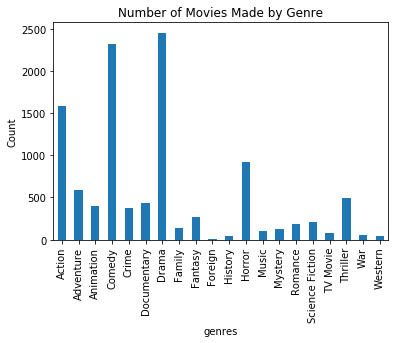

In [14]:
#this creates a bar plot that depicts the count distribution of the different genres
df.groupby(['genres'])['id'].count().plot(title='Number of Movies Made by Genre',kind='bar').set_ylabel('Count')
df.groupby(['genres'])[['id']].count()

The top 5 genres of most movies made are as follows:
1. Drama - 2453 movies made 
2. Comedy- 2318 movies made
3. Action- 1587 movies made
4. Horror - 915 movies made 
5. Adventure- 585 movies made
 

What genre of movie recieves the highest average popularity rating?


,popularity
genres,
Action,0.837451
Adventure,1.219846
Animation,0.810874
Comedy,0.537326
Crime,0.694063
Documentary,0.177183
Drama,0.552446
Family,0.730987
Fantasy,0.865390


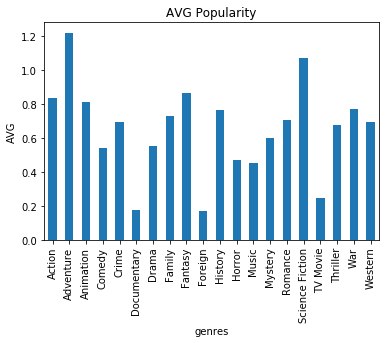

In [15]:
df.groupby(['genres'])['popularity'].mean().plot(title='AVG Popularity',kind='bar').set_ylabel('AVG')
df.groupby(['genres'])[['popularity']].mean()

the genres with the highest average popularity rating are as follows:
1. Adventure (1.21)
2. Science Fiction (1.07)
3. Fantasy (0.86)
4. Action (0.83)
5. Animation (0.81)


### Research Question 2 

What properties are associated with movies that have high revenue?

What properties are associated with movies that are popular?


For these questions I will clean the data some more.  The revenue and budget columns have several thousand values entered as 0.  Because they were entered as 0 and not left empty, they do not appear as null-values.  But I will delete all the rows entered as 0.

In [16]:
#sort the data acording to numbers
df_1=df.groupby(['genres']).count().sort_values(by=['id'],ascending=False)
df_new=df[df['genres'].isin(df_1.index.values.tolist())]

#remove budget = 0
df_new1=df_new[df_new['budget_adj']>0]
#remove revenue = 0
df_new2=df_new1[df_new1['revenue_adj']>0]
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null flo

You can see the dataset drop from 10834 entries down to 3854 entries after deleting the rows in the revenue and budget columns entered as 0.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


,mean,std
genres,,
Action,6.105521e+07,5.034757e+07
Adventure,8.615973e+07,6.527904e+07
Animation,8.541191e+07,5.460554e+07
Comedy,3.105447e+07,2.641548e+07
Crime,3.180133e+07,2.419861e+07
Documentary,4.925998e+06,6.388609e+06
Drama,3.088464e+07,3.137586e+07
Family,6.744876e+07,5.496467e+07
Fantasy,6.405080e+07,5.159764e+07


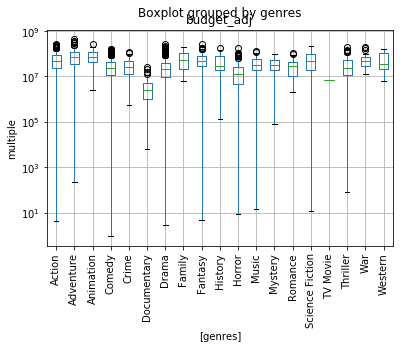

In [17]:
#create boxplot and get statistics for genres
df_new2.boxplot(column=['budget_adj'], by=['genres'], rot=90).set_yscale('log')
plt.ylabel("multiple")
pd.DataFrame(df_new2.groupby(['genres'])['budget_adj'].describe().loc[:,['mean','std']])

,budget_adj
count,3.854000e+03
mean,4.423999e+07
std,4.480925e+07
min,9.693980e-01
25%,1.309053e+07
50%,3.001611e+07
75%,6.061307e+07
max,4.250000e+08


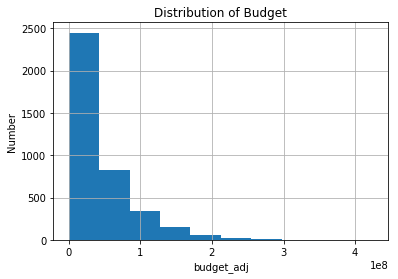

In [18]:
#create a histogram to explore budget of all movies made
ax=df_new2['budget_adj'].hist()
ax.set_ylabel('Number')
ax.set_xlabel('budget_adj')
ax.set_title('Distribution of Budget')
pd.DataFrame(df_new2['budget_adj'].describe())

,popularity
count,3854.000000
mean,1.191554
std,1.475162
min,0.001117
25%,0.462368
50%,0.797511
75%,1.368324
max,32.985763


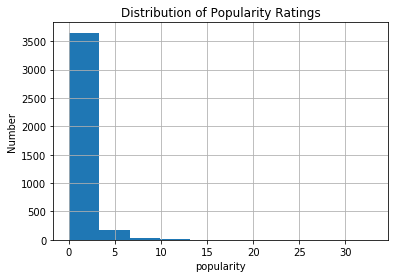

In [19]:
#create a histogram to explore popularity of all movies made
ax=df_new2['popularity'].hist()
ax.set_ylabel('Number')
ax.set_xlabel('popularity')
ax.set_title('Distribution of Popularity Ratings')
pd.DataFrame(df_new2['popularity'].describe())

In [20]:
df_new2.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.188878,-0.027449,-0.003206,-0.035688,0.111470,-0.001269,0.489926,-0.124035,-0.088287
popularity,0.188878,1.000000,0.446987,0.615535,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
budget,-0.027449,0.446987,1.000000,0.688556,0.260977,0.556937,0.024169,0.268040,0.958520,0.533498
revenue,-0.003206,0.615535,0.688556,1.000000,0.250298,0.754567,0.227123,0.139140,0.657567,0.900882
runtime,-0.035688,0.215092,0.260977,0.250298,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.111470,0.780096,0.556937,0.754567,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,-0.001269,0.317866,0.024169,0.227123,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.489926,0.173278,0.268040,0.139140,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,-0.124035,0.399356,0.958520,0.657567,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,-0.088287,0.546959,0.533498,0.900882,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


The column 'id' uniquely identifies the movie and will not be taken into considiration for this analysis.

Movies with high revenue(revenue_adj) are most positively correlated with vote_count(.65) and budget_adj(.57).

Movies that are popular are most positively correlated with vote_count(.78) and revenue_adj(.54)

(-100000000, 2000000000)

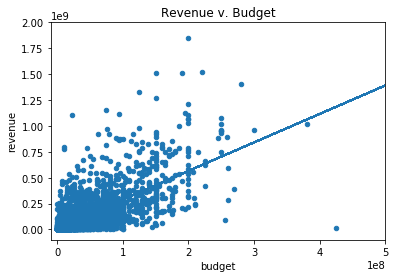

In [21]:
#Graphs the correlation between revenue_adj and budget_adj
#regress 'espression' onto 'motifscore' (plus an intercept)
model =sm.OLS(df_new2.revenue_adj, sm.add_constant(df_new2.budget_adj))
p = model.fit().params
#generate x-values for regression line (two is sufficient)
x = df_new2.revenue_adj
#scatter-plot data
ax = df_new2.plot(x='budget', y='revenue', kind='scatter', title='Revenue v. Budget')
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p.budget_adj* x)
ax.set_xlim([-10000000,500000000])
ax.set_ylim([-100000000,2000000000]) 

You can see a weak positive correlation between revenue_adj and budget_adj of 0.57. 

(0, 35)

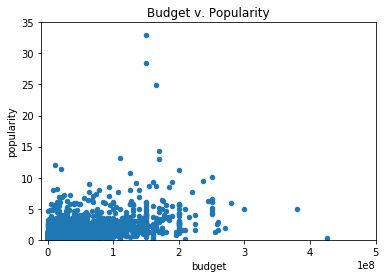

In [22]:
#Graph the correlation between budget and popularity
#regress 'espression' onto 'motifscore' (plus an intercept)
model =sm.OLS(df_new2.popularity, sm.add_constant(df_new2.budget_adj))
p = model.fit().params
#generate x-values for regression line (two is sufficient)
x = df_new2.popularity
#scatter-plot data
ax = df_new2.plot(x='budget', y='popularity', kind='scatter', title='Budget v. Popularity')
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p.budget_adj* x)
ax.set_xlim([-10000000,500000000])
ax.set_ylim([0,35]) 

You can see no real correlation between budget_adj and popularity of 0.43. You can conclude that having a high budget does not ensure a high popularity rating.

<a id='conclusions'></a>
## Conclusions

To answer the reseach questions it was found that the genre of movies made most throught out the years are as follows:
1. Drama - 2453 movies made 
2. Comedy- 2318 movies made
3. Action- 1587 movies made
4. Horror - 915 movies made 
5. Adventure- 585 movies made
 
 
The genres with the highest average popularity rating are as follows:

1. Adventure (1.21)
2. Science Fiction (1.07)
3. Fantasy (0.86)
4. Action (0.83)
5. Animation (0.81)


Movies with high revenue as most positively correlated with vote_count(.65) and budget_adj(.57). This makes sense as movies that have a high vote count are more well liked.  Because they are more well liked people or likely to spend money to watch the movie.  

Movies that are popular are most positively correlated with vote_count(.78) and revenue_adj(.54). This makes sense because the more popular a movie the more votes it recieves and the more money it makes.

The limitations of this analysis comes in the values of the genre column. The dataset came with over 20 different genres with most movies categorizing themselves in multiple genres.  For this analysis I categorized the movie into the first genre that was in the value. In addition, alot of the genres could be recognized as sub-genres that fall under the umbrella of more general genre. For example in this analysis there were many hundreds of movies categorized as either 'Western' or 'War' that could be catergorized as 'action'.  I believe a better analysis would be to categorize the movies into the 5-10 general genres instead of having 20.  I believe it would give a more accurate representation of the data.

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0